# Setup Environment

In [25]:
from bs4 import BeautifulSoup
import warnings
warnings.filterwarnings("ignore", category = UserWarning, module = 'bs4')

import lxml
import string
import re
import emoji

import pandas as pd
import numpy as np
import copy

import spacy
from spacy.tokenizer import Tokenizer

import collections
import random

import matplotlib.pyplot as plt # SOLVED: /usr/lib/python3.9/site-packages/IPython/core/pylabtools.py (LINE 386);
plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Data

In [26]:
dtf_pumps = pd.read_csv("~/NLP/Project/data/eda/tweets.csv"); 
dtf_pumps[:10]

,Unnamed: 0,id,text,source,created_at,author_id,token,name,description,username,...,profile_image_url,account_created_at,protected,followers_count,following_count,tweet_count,listed_count,bot,target,train
0,1,1384476192372187142,TRX/USD | $TRXUSD | $TRX $USD\n\nDownward tren...,Prime Trading Ideas,2021-04-20 11:57:01,1053454356878479361,TRX,Prime Trader,Follow me for real-time charts and technical a...,IdeasPrime,...,https://pbs.twimg.com/profile_images/105345523...,2018-10-20T01:14:25.000Z,False,5537,0,143737,105,0,0,0
1,2,1384475936352083974,How did I end up holding a large bag of $TRX?,Twitter for Android,2021-04-20 11:56:00,1258702534958514176,TRX,¥¥ CR¥PTO,I need an account to keep track of the cesspit...,yy_crypto,...,https://pbs.twimg.com/profile_images/125870287...,2020-05-08T10:17:56.000Z,False,66,194,488,0,0,0,0
2,3,1384475862259621888,Join https://t.co/aZFpfr3XuN 📈New Binance and ...,Twitter for iPhone,2021-04-20 11:55:42,3366379990,TRX,Crypto Cadet,NaN,CryptoCadet00,...,https://pbs.twimg.com/profile_images/130272007...,2015-07-08T18:12:15.000Z,False,29,132,117,1,0,0,0
3,4,1384475836779270150,Well I hope you guys have enjoyed this micro b...,Twitter for Android,2021-04-20 11:55:36,1354900493932376075,TRX,Titanic Tatum,"crypto enthusiast\n\nSpot trader, long term in...",TitanicTatum,...,https://pbs.twimg.com/profile_images/135713575...,2021-01-28T21:13:53.000Z,False,60,91,247,0,0,0,0
4,5,1384475760342310912,Join https://t.co/aZFpfr3XuN 📈New Binance and ...,Twitter for iPhone,2021-04-20 11:55:18,3366379990,TRX,Crypto Cadet,NaN,CryptoCadet00,...,https://pbs.twimg.com/profile_images/130272007...,2015-07-08T18:12:15.000Z,False,29,132,117,1,0,0,0
5,6,1384475622009819137,$XVG - $BTC - Aslong as we can remain above 56...,Twitter for Android,2021-04-20 11:54:45,1383953342645211142,TRX,junayed,https://t.co/uei3yafdUK,junayed61732943,...,https://pbs.twimg.com/profile_images/138395380...,2021-04-19T01:19:54.000Z,False,6,0,94,0,0,0,0
6,7,1384475366354395140,Time is running out folks to get in early into...,Twitter for Android,2021-04-20 11:53:44,1383953342645211142,TRX,junayed,https://t.co/uei3yafdUK,junayed61732943,...,https://pbs.twimg.com/profile_images/138395380...,2021-04-19T01:19:54.000Z,False,6,0,94,0,0,0,0
7,8,1384475140960960519,$VTC Ready! Send it! Vertcoin to the moon.🚀🚀🚀\...,Twitter Web App,2021-04-20 11:52:50,207945833,TRX,VertcoinBeastMode,NaN,Tr_92_,...,https://pbs.twimg.com/profile_images/137215158...,2010-10-26T10:34:02.000Z,False,135,38,1201,1,0,0,0
8,9,1384475058488365058,"$BTC: $9,476.17 (789.68%)\n$ETH: $15,316.66 (1...","Pipedream, Inc",2021-04-20 11:52:30,1328583929704681472,TRX,$1200 Stimulus is Now Worth,Tracking what a US $1200 stimulus check would ...,crypto_stimulus,...,https://pbs.twimg.com/profile_images/134271048...,2020-11-17T06:21:12.000Z,False,792,21,4556,8,0,0,0
9,10,1384474949667069954,The @FUSIONProtocol has got it all: \ninfrastr...,Twitter for Android,2021-04-20 11:52:04,1383953342645211142,TRX,junayed,https://t.co/uei3yafdUK,junayed61732943,...,https://pbs.twimg.com/profile_images/138395380...,2021-04-19T01:19:54.000Z,False,6,0,94,0,0,0,0


### `String Length`: appears a bit strange since the Twitter's character limit is 280;

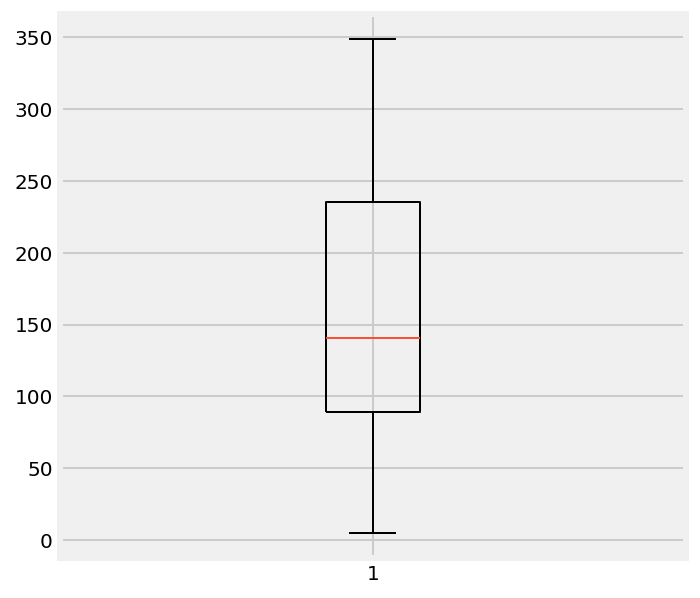

In [27]:
dtf_pumps['STEP0_clean_len'] = [len(i) for i in dtf_pumps.text]
fig, ax = plt.subplots(figsize = (5, 5))
plt.boxplot(dtf_pumps.STEP0_clean_len)
plt.show()

# Cleaning and Preprocessing

* HTML and UTF-8 BOM (Byte Order Mark) Decoding
* LOWERCASE and COMMONs
* URLs
* CASHTAGs
* HASHTAGs
* MENTIONs
* ABBREVIATIONs
* PUNCTUATION
* NUMBERs
* EMOJIs
* Tokenization and Lemmatisation

In [28]:
clean_text = dtf_pumps.text.tolist()
clean_text[5:10]

['$XVG - $BTC - Aslong as we can remain above 56 on the 4hr im bullish.\n\nTargets, 67, 76 &amp; 87 if we continue higher.\n\n$SXP $VTHO $XVG $XRP $TRX $HBAR $DOT $CHZ $DOGE $ADA $ATOM $IOTA $ZIL $NEO $XLM $XTZ $CEL https://t.co/i4HslTuzVr',
 'Time is running out folks to get in early into @PointPay1 #blockchain #bank of the future.\n\nGet in to $PXP before price jump by 50%.\n\n$xrp $eth $bnb $btc $xlm $ada $dash $dot $eos $link $ltc $neo $trx $vet $matic $doge $dot $uni $matic $link $bat $enj $coti $algo $atom $coti $xlm https://t.co/NQXJBAwkMe',
 '$VTC Ready! Send it! Vertcoin to the moon.🚀🚀🚀\n\n$fet $sxp $doge $trb $trx $luna $aion',
 '$BTC: $9,476.17 (789.68%)\n$ETH: $15,316.66 (1,276.39%)\n$ADA: $42,299.30 (3,524.94%)\n$BNB: $40,367.31 (3,363.94%)\n$DOGE: $247,209.03 (20,600.75%)\n$LINK: $14,507.54 (1,208.96%)\n$TRX: $12,668.47 (1,055.71%)\n$XRP: $8,313.39 (692.78%)\n\n#bitcoin #doge #cardano #ethereum #bnb',
 'The @FUSIONProtocol has got it all: \ninfrastructure + dex/bridge + b

## Data Preparation 1: HTML and UTF-8 BOM (Byte Order Mark) Decoding 

#### Typically `&amp` or `&gt` (ect.) HTML encodings are not converted to text. Decoding HTML to general text will be the first step of data preparation.

In [29]:
re_AMPs = [r'\S+\&\S+', r'\s\&\S+', r'\S+\&\s', r'\s\&\s']; AMP_MATCH = []; 
for i, tweet in enumerate(clean_text):
    if len([re.findall(regex, tweet) for regex in re_AMPs]):
        [AMP_MATCH.append(j) for j in [re.findall(regex, tweet) for regex in re_AMPs]];  
AMP_COUNTER = collections.Counter([item for sublist in AMP_MATCH for item in sublist]); AMP_COUNTER.most_common(10)

[(' &amp;', 8244),
 ('-&gt;', 2075),
 (' &gt;', 1044),
 ('==&gt;', 475),
 ('--&gt;', 386),
 (' &lt;', 312),
 ('\n&gt;', 191),
 ('=&gt;', 166),
 ('H&amp;S', 100),
 ('(&lt;', 84)]

In [30]:
for i, tweet in enumerate(clean_text):
    clean_text[i] = BeautifulSoup(tweet).get_text().encode().decode("utf-8-sig").replace(u"\ufffd", "?"); 
    if sum([len(i) for i in clean_text[i]]) < sum([len(i) for i in tweet]):
        print("------[ ORIGINAL - ", i, "]------\n\n", tweet, "\n"); 
        print("------[ MODIFIED - ", i, "]------\n\n", clean_text[i], "\n");  

gins in 3 days & in 10 days #Chrysalis 💎🦋💎wakes up & unfolds its full power.

$iota $miota #miota #BTC #ETH #USDT #doge #binance #ADA #NFTs #DeFi 

https://t.co/PKtzzFgkJd 

------[ ORIGINAL -  274563 ]------

 🇺🇸Chrysalis Update: Everything you need to know

Reminder:

The biggest update in the history of #IOTA begins in 3 days &amp; in 10 days #Chrysalis 💎🦋💎wakes up &amp; unfolds its full power.

$iota $miota #miota #BTC #ETH #USDT #doge #binance #ADA #NFTs #DeFi 

https://t.co/8fILGga875 

------[ MODIFIED -  274563 ]------

 🇺🇸Chrysalis Update: Everything you need to know

Reminder:

The biggest update in the history of #IOTA begins in 3 days & in 10 days #Chrysalis 💎🦋💎wakes up & unfolds its full power.

$iota $miota #miota #BTC #ETH #USDT #doge #binance #ADA #NFTs #DeFi 

https://t.co/8fILGga875 

------[ ORIGINAL -  274564 ]------

 🇩🇪IOTA, DeFi und Fog computing

Reminder:

The biggest update in the history of #IOTA begins in 3 days &amp; in 10 days #Chrysalis 💎🦋💎wakes up &amp; 

In [31]:
re_AMPs = [r'\S+\&\S+', r'\s\&\S+', r'\S+\&\s', r'\s\&\s']; AMP_MATCH = []; 
for i, tweet in enumerate(clean_text):
    [AMP_MATCH.append(j) for j in [re.findall(regex, tweet) for regex in re_AMPs]];  
AMP_COUNTER = collections.Counter([item for sublist in AMP_MATCH for item in sublist]); AMP_COUNTER.most_common(10)

[(' & ', 8238),
 ('H&S', 100),
 ('\n& ', 63),
 ('liquidity&staking', 45),
 ('C&H', 43),
 ('💲ERC-20&BEP-20', 37),
 ('S&P', 32),
 ('iH&S', 29),
 ('(& ', 19),
 (' &4.15-', 18)]

In [32]:
re_AMPs = [r'H\&S', r'liquidity\&staking', r'C\&H', r'ERC-20\&BEP-20', r'S\&P'];
for i, tweet in enumerate(clean_text):
    if len(re.findall(r'H\&S', tweet)):
        clean_text[i] = re.sub(r'H\&S', "HANDS", tweet); 
    if len(re.findall(r'liquidity\&staking', tweet)):
        clean_text[i] = re.sub(r'liquidity\&staking', "liquidityANDstaking", tweet); 
    if len(re.findall(r'C\&H', tweet)):
        clean_text[i] = re.sub(r'C\&H', "CANDH", tweet); 
    if len(re.findall(r'ERC-20\&BEP-20', tweet)):
        clean_text[i] = re.sub(r'ERC-20\&BEP-20', "ERCANDBEP", tweet); 
    if len(re.findall(r'S\&P', tweet)):
        clean_text[i] = re.sub(r'S\&P', "SANDP", tweet); 

    if sum([len(i) for i in clean_text[i]]) < sum([len(i) for i in tweet]):
        print("------[ ORIGINAL - ", i, "]------\n\n", tweet, "\n"); 
        print("------[ MODIFIED - ", i, "]------\n\n", clean_text[i], "\n");  
del re_AMPs, AMP_MATCH, AMP_COUNTER

token running on ETH & BSC
👍Ethereum mainnet & BSC
👍Contracts are available to check on Etherscan & BscScan
👍Total support: 100,000,000

$near $stx $sybc $trx $neo $busd $ht 

------[ MODIFIED -  12969 ]------

 Getting rewards for $KANGAL coin holding is nice with @Kangaltoken

👍ERCANDBEP token running on ETH & BSC
👍Ethereum mainnet & BSC
👍Contracts are available to check on Etherscan & BscScan
👍Total support: 100,000,000

$near $stx $sybc $trx $neo $busd $ht 

------[ ORIGINAL -  20866 ]------

 Don’t notice me that I haven’t said you. @Kangaltoken is the greatest promising project for now

💲ERC-20&BEP-20 coin running on ETH & BSC
💲Ethereum mainnet & BSC
💲Solidity 0.8 Contract
💲Total supply: 100,000,000

$cspr $flow $xaur $city $mss $eos $tlm $ftt $chsb $sc 

------[ MODIFIED -  20866 ]------

 Don’t notice me that I haven’t said you. @Kangaltoken is the greatest promising project for now

💲ERCANDBEP coin running on ETH & BSC
💲Ethereum mainnet & BSC
💲Solidity 0.8 Contract
💲Total supp

In [33]:
dtf_pumps['STEP1_clean_len'] = [len(t) for t in clean_text]; # Keeping track of char reduction in tweets;

In [11]:
# PART1 = copy.deepcopy(clean_text); # Creating in guardian to avoid repeating this part everytime;

In [12]:
# clean_text = copy.deepcopy(PART1); 

## Data Preparation 2: LOWERCASE & COMMONs

In [34]:
re_COMMONs = [r'\n']; COMMON_MATCH = []; 
for i, tweet in enumerate(clean_text):
    [COMMON_MATCH.append(j) for j in [re.findall(regex, tweet) for regex in re_COMMONs]];  
COMMON_COUNTER = collections.Counter([item for sublist in COMMON_MATCH for item in sublist]); COMMON_COUNTER.most_common(10)

[('\n', 758153)]

In [35]:
for i, tweet in enumerate(clean_text):
    clean_text[i] = re.sub(r'\n', ' ', tweet.lower()); 
del re_COMMONs, COMMON_MATCH, COMMON_COUNTER

In [36]:
dtf_pumps['STEP2_clean_len'] = [len(t) for t in clean_text]; # Keeping track of char reduction in tweets;

In [16]:
# PART2 = copy.deepcopy(clean_text); # Creating in guardian to avoid repeating this part everytime;

In [17]:
# clean_text = copy.deepcopy(PART2); 

## Data Preparation 3: URLs

In [37]:
re_HTTPs = [r'\S+http\S+', r'\shttp\S+', r'\S+http\s', r'\shttp\s', r'\S+https\s', r'\shttps\s']; HTTP_MATCH = []; 
for i, tweet in enumerate(clean_text):
    [HTTP_MATCH.append(j) for j in [re.findall(regex, tweet) for regex in re_HTTPs]];  
HTTP_COUNTER = collections.Counter([item for sublist in HTTP_MATCH for item in sublist]); HTTP_COUNTER.most_common(10)

[(' https://t.co/uztjjf2ebe', 4813),
 (' https://t.co/qrebk3nqfh', 4160),
 (' https://t.co/hak6tqgbkx', 2129),
 (' https://t.co/izrixuhfif', 1802),
 (' https://t.co/uztjjfkf3c', 1608),
 (' https://t.co/imb1mj8cs1', 1012),
 (' https://t.co/livo4vt168', 665),
 (' https://t.co/q3f4yzfc9b', 619),
 (' https://t.co/vmsa8rwq1g', 498),
 (' https://t.co/rfwcra6mh3', 396)]

In [38]:
for i, tweet in enumerate(clean_text):       
    clean_text[i] = re.sub(r"http\S+", "", tweet); 

In [39]:
re_HTTPs = [r'\S+http\S+', r'\shttp\S+', r'\S+http\s', r'\shttp\s', r'\S+https\s', r'\shttps\s']; HTTP_MATCH = []; 
for i, tweet in enumerate(clean_text):
    [HTTP_MATCH.append(j) for j in [re.findall(regex, tweet) for regex in re_HTTPs]];  
HTTP_COUNTER = collections.Counter([item for sublist in HTTP_MATCH for item in sublist]); HTTP_COUNTER.most_common(10)

[(' http ', 1)]

In [40]:
for i, tweet in enumerate(clean_text):       
    clean_text[i] = re.sub(r"(http)", "", tweet); 
    if sum([len(i) for i in clean_text[i]]) < sum([len(i) for i in tweet]):
        print("------[ ORIGINAL - ", i, "]------\n\n", tweet, "\n"); 
        print("------[ MODIFIED - ", i, "]------\n\n", clean_text[i], "\n");  
del re_HTTPs, HTTP_MATCH, HTTP_COUNTER

------[ ORIGINAL -  14531 ]------

 it shouldn’t have to be about making sure every single transaction be open for all to see; rather, have all transactions “secure” from alice -> bob. #bitcoin = http #monero =   this tax season would have you used a website to help you do them *not* with   $xmr $btc 

------[ MODIFIED -  14531 ]------

 it shouldn’t have to be about making sure every single transaction be open for all to see; rather, have all transactions “secure” from alice -> bob. #bitcoin =  #monero =   this tax season would have you used a website to help you do them *not* with   $xmr $btc 

------[ ORIGINAL -  143211 ]------

 if i hadn’t taken profits last night i would be in the red today, don’t be greedy close your trade when you’re up big and look for another entry! #django #python #bootstrap4 #100daysofcode #crypto #defi #investing #alts $vet $ada $celr $btc  #marketing #trading #seokjin #seo http 

------[ MODIFIED -  143211 ]------

 if i hadn’t taken profits last night i 

In [41]:
re_WWWs = [r'\S+www\.[A-Za-z0-9]+\.\s', r'\swww\.[A-Za-z0-9]+\.\S+', r'\S+www\.[A-Za-z0-9]+\.\S+', r'\swww\.[A-Za-z0-9]+\.\s']; WWW_MATCH = []; 
for i, tweet in enumerate(clean_text):
    [WWW_MATCH.append(j) for j in [re.findall(regex, tweet) for regex in re_WWWs]];  
WWW_COUNTER = collections.Counter([item for sublist in WWW_MATCH for item in sublist]); WWW_COUNTER.most_common(10)

[('//www.investing.com/', 4)]

In [42]:
for i, tweet in enumerate(clean_text):       
    clean_text[i] = re.sub(r"(//www.investing.com/)", "", tweet); 
    if sum([len(i) for i in clean_text[i]]) < sum([len(i) for i in tweet]):
        print("------[ ORIGINAL - ", i, "]------\n\n", tweet, "\n"); 
        print("------[ MODIFIED - ", i, "]------\n\n", clean_text[i], "\n");  
del re_WWS, WWW_MATCH, WWW_COUNTER

------[ ORIGINAL -  50061 ]------

 $btc/usd chart via @investingcom - //www.investing.com/  

------[ MODIFIED -  50061 ]------

 $btc/usd chart via @investingcom -   

------[ ORIGINAL -  144985 ]------

 $btc/usd chart via @investingcom - //www.investing.com/  

------[ MODIFIED -  144985 ]------

 $btc/usd chart via @investingcom -   

------[ ORIGINAL -  149243 ]------

 for those into btc, i see a bearish move this entire month to around 40000-43000 usd/btc.  its is about time you sold.   #btc #bitcoin #forex #forexsignals   $btc/usd chart via @investingcom - //www.investing.com/  

------[ MODIFIED -  149243 ]------

 for those into btc, i see a bearish move this entire month to around 40000-43000 usd/btc.  its is about time you sold.   #btc #bitcoin #forex #forexsignals   $btc/usd chart via @investingcom -   

------[ ORIGINAL -  151395 ]------

 $eth/usd chart via @investingcom - //www.investing.com/   acording to price channel, bb, rsi, ~$2000/eth should hold 

------[ MODIFI

NameError: name 're_WWS' is not defined

In [43]:
dtf_pumps['STEP3_clean_len'] = [len(t) for t in clean_text]; # Keeping track of char reduction in tweets;

In [67]:
# PART3 = copy.deepcopy(clean_text); # Creating in guardian to avoid repeating this part everytime;

In [109]:
# clean_text = copy.deepcopy(PART3); 

## Data Preparation 4: CASHTAGs

In [45]:
CASHTAG_IDX = []; CASHTAG_MATCH = [];  
for i, tweet in enumerate(clean_text):
    if len(re.findall(r"\$[A-Za-z]+", tweet)):
        CASHTAG_IDX.append(i); 
        CASHTAG_MATCH.append(re.findall(r"\$[A-Za-z]+", tweet)); 
CASHTAG_COUNTER = collections.Counter([item for sublist in CASHTAG_MATCH for item in sublist]); CASHTAG_COUNTER.most_common(10) 

[('$btc', 134239),
 ('$eth', 94134),
 ('$xrp', 71651),
 ('$ada', 46494),
 ('$doge', 35599),
 ('$bnb', 28663),
 ('$ltc', 25707),
 ('$luna', 21102),
 ('$link', 18587),
 ('$dot', 16904)]

In [46]:
CASHTAGs = [re.sub(r"\$", "", i[0]) for i in sorted(CASHTAG_COUNTER.items(), key = lambda x: x[1], reverse = True)]; CASHTAGs[:10]

['btc', 'eth', 'xrp', 'ada', 'doge', 'bnb', 'ltc', 'luna', 'link', 'dot']

In [47]:
sample = random.sample(CASHTAG_IDX, 10); 
for i, tweet in enumerate(clean_text):
    clean_text[i] = re.sub(r"\$[A-Za-z]+", "", tweet)
del sample, CASHTAG_IDX, CASHTAG_MATCH, CASHTAG_COUNTER

In [48]:
re_CASHTAGs = [r'\S+\$\s', r'\s\$\S+', r'\S+\$\S+', r'\s\$\s']; CASHTAG_MATCH = []; 
for i, tweet in enumerate(clean_text):
    [CASHTAG_MATCH.append(j) for j in [re.findall(regex, tweet) for regex in re_CASHTAGs]];  
CASHTAG_COUNTER = collections.Counter([item for sublist in CASHTAG_MATCH for item in sublist]); CASHTAG_COUNTER.most_common(10)

[(' $ ', 9364),
 (' $2', 1455),
 (' $1', 1337),
 ('2500$ ', 841),
 (' $10', 821),
 (' $100', 803),
 ('($0.013)', 463),
 (' $60k', 438),
 (' $1inch', 431),
 (' $5', 381)]

In [49]:
dtf_pumps['STEP4_clean_len'] = [len(t) for t in clean_text]; # Keeping track of char reduction in tweets;

In [74]:
# PART4 = copy.deepcopy(clean_text); # Creating in guardian to avoid repeating this part everytime;

In [271]:
# clean_text = copy.deepcopy(PART4); 

## Data Preparation 5: HASHTAGs

In [50]:
HASHTAG_IDX = []; HASHTAG_MATCH = []; 
for i, tweet in enumerate(clean_text):
    if len(re.findall(r"#[A-Za-z]+", tweet)):
        HASHTAG_IDX.append(i); 
        HASHTAG_MATCH.append(re.findall(r"#[A-Za-z]+", tweet)); 
HASHTAG_COUNTER = collections.Counter([item for sublist in HASHTAG_MATCH for item in sublist]); HASHTAG_COUNTER.most_common(10)

[('#bitcoin', 42584),
 ('#crypto', 38774),
 ('#btc', 27836),
 ('#nft', 16724),
 ('#eth', 16156),
 ('#bsc', 14781),
 ('#cryptocurrency', 14563),
 ('#cardano', 13139),
 ('#ethereum', 12788),
 ('#blockchain', 10873)]

In [51]:
for i, tweet in enumerate(clean_text):

    for HASHTAG in re.findall(r"#[A-Za-z0-9]+", tweet):
        if re.sub(r"#", "", HASHTAG) in CASHTAGs:
            tweet = re.sub(HASHTAG, "", tweet); 
    
    if sum([len(i) for i in tweet]) < sum([len(i) for i in clean_text[i]]):
        print("------[ ORIGINAL - ", i, "]------\n\n", clean_text[i], "\n"); 
        print("------[ MODIFIED - ", i, "]------\n\n", tweet, "\n"); 

    clean_text[i] = tweet; 

del HASHTAG_IDX, HASHTAG_MATCH, HASHTAG_COUNTER, CASHTAGs

GINAL -  274875 ]------

 „this month has been quite busy for us, as we enter the home stretch on our way to delivering nectar, the first feature-complete implementation of our fully decentralized, coordinator-free network, due in a few weeks!“  💎🦋💎 #iota  #miota     

------[ MODIFIED -  274875 ]------

 „this month has been quite busy for us, as we enter the home stretch on our way to delivering nectar, the first feature-complete implementation of our fully decentralized, coordinator-free network, due in a few weeks!“  💎🦋💎        

------[ ORIGINAL -  274878 ]------

 #iota - #launchpad 🔜🤐❓  think about the horizons that will open up with a  based launchpad!  wait🤫  didn't #bitpanda want to introduce a launchpad?  does bitpanda with #pantos not already cooperate with the if😉?  💎🦋💎  #miota  iota will rock it & is unstoppable!  

------[ MODIFIED -  274878 ]------

  - #launchpad 🔜🤐❓  think about the horizons that will open up with a  based launchpad!  wait🤫  didn't #bitpanda want to i

In [52]:
re_HASHTAGs = [r'\S+#\s', r'\s#\S+', r'\S+#\S+', r'\s#\s']; HASHTAG_MATCH = []; 
for i, tweet in enumerate(clean_text):
    [HASHTAG_MATCH.append(j) for j in [re.findall(regex, tweet) for regex in re_HASHTAGs]];  
HASHTAG_COUNTER = collections.Counter([item for sublist in HASHTAG_MATCH for item in sublist]); HASHTAG_COUNTER.most_common(10)

[(' #fintech', 7145),
 (' #cryptoart', 5851),
 (' #digitalart', 4951),
 (' #rarible', 4678),
 (' #trading', 3031),
 (' #binancefutures', 1672),
 (' #cryptocurrencies', 1404),
 (' #volume', 1326),
 (' #cryptotrading', 1226),
 (' #cryptobot', 984)]

In [53]:
dtf_pumps['STEP5_clean_len'] = [len(t) for t in clean_text]; # Keeping track of char reduction in tweets;

In [80]:
# PART5 = copy.deepcopy(clean_text); # Creating in guardian to avoid repeating this part everytime;

In [279]:
# clean_text = copy.deepcopy(PART5); 

## Data Preparation 6: MENTIONs

In [55]:
MENTION_IDX = []; MENTION_MATCH = [];  
for i, tweet in enumerate(clean_text):
    if len(re.findall(r'@[A-Za-z0-9_][A-Za-z0-9_]+', tweet)):
        MENTION_IDX.append(i); 
        MENTION_MATCH.append(re.findall(r'@[A-Za-z0-9_][A-Za-z0-9_]+', tweet)); 
MENTION_COUNTER = collections.Counter([item for sublist in MENTION_MATCH for item in sublist]); MENTION_COUNTER.most_common(10) 

[('@binance', 1019),
 ('@coinbase', 847),
 ('@elonmusk', 802),
 ('@cz_binance', 650),
 ('@mrwhalewhisper', 642),
 ('@unoreinsure', 634),
 ('@polkacover', 619),
 ('@pancakeswap', 602),
 ('@btc', 531),
 ('@ripple', 478)]

In [56]:
sample = random.sample(MENTION_IDX, 10);
for i, tweet in enumerate(clean_text):

    if i in sample:
        print("------[ ORIGINAL - ", i, "]------\n\n", tweet, "\n"); 

    clean_text[i] = re.sub(r'@[A-Za-z0-9_][A-Za-z0-9_]+', "",tweet);

    if i in sample:
        print("------[ ORIGINAL - ", i, "]------\n\n", clean_text[i], "\n");  
        
del sample, MENTION_IDX, MENTION_MATCH, MENTION_COUNTER

------[ ORIGINAL -  10413 ]------

  pumped right now ..?   centurymining ics  network @tronfoundation @tron_ar 

------[ ORIGINAL -  10413 ]------

  pumped right now ..?   centurymining ics  network   

------[ ORIGINAL -  51035 ]------

 🔥🔥this is not a test! 🔥🔥    @daxhund_app is mooning hard!  🌟 not slowing, this is your call  fomo is real, cause you will mo! 😂💎 @uniswap        twitter news currencynews currencies    #tothemoon  

------[ ORIGINAL -  51035 ]------

 🔥🔥this is not a test! 🔥🔥     is mooning hard!  🌟 not slowing, this is your call  fomo is real, cause you will mo! 😂💎         twitter news currencynews currencies    #tothemoon  

------[ ORIGINAL -  80182 ]------

  min $3 stock. every veterinarian office in america will buy their groundbreaking technology.     @topstockalerts1 

------[ ORIGINAL -  80182 ]------

  min $3 stock. every veterinarian office in america will buy their groundbreaking technology.      

------[ ORIGINAL -  87721 ]------

 miami's e11even say

In [57]:
re_MENTIONs = [r'\S+@\s', r'\s@\S+', r'\S+@\S+', r'\s@\s']; MENTION_MATCH = []; 
for i, tweet in enumerate(clean_text):
    [MENTION_MATCH.append(j) for j in [re.findall(regex, tweet) for regex in re_MENTIONs]];  
MENTION_COUNTER = collections.Counter([item for sublist in MENTION_MATCH for item in sublist]); MENTION_COUNTER.most_common(10)

[(' @ ', 2961),
 (' @$58,000.0', 17),
 (' @$60,600.0', 15),
 (' @$63,000.0', 14),
 ('on:@ ', 12),
 (' @$1.6', 11),
 (' @$60,400.0', 10),
 (' @$62,600.0', 10),
 (' @$54,700.0', 9),
 (' @$60,500.0', 9)]

In [58]:
dtf_pumps['STEP6_clean_len'] = [len(t) for t in clean_text]; # Keeping track of char reduction in tweets;

In [86]:
# PART6 = copy.deepcopy(clean_text); # Creating in guardian to avoid repeating this part everytime;

In [327]:
# clean_text = copy.deepcopy(PART6); 

## Data Preparation 7: ABBREVIATIONs

In [59]:
re_ABBREVIATIONs = [r'\S+\'\s', r'\s\'\S+', r'\S+’\S+', r'\s’\s']; ABBREVIATION_MATCH = []; 
for i, tweet in enumerate(clean_text):
    [ABBREVIATION_MATCH.append(j) for j in [re.findall(regex, tweet) for regex in re_ABBREVIATIONs]];  
ABBREVIATION_COUNTER = collections.Counter([item for sublist in ABBREVIATION_MATCH for item in sublist]); ABBREVIATION_COUNTER.most_common(10)

[('it’s', 3403),
 ('don’t', 3370),
 ('i’m', 2515),
 ('let’s', 1227),
 ('can’t', 1090),
 (" 's", 808),
 ('that’s', 791),
 ('you’re', 736),
 ('i’ve', 655),
 ('i’ll', 546)]

In [60]:
for i, tweet in enumerate(clean_text):
    clean_text[i] = re.sub("\'s", " is", tweet); 
for i, tweet in enumerate(clean_text):
    clean_text[i] = re.sub("\’s", " is", tweet); 
for i, tweet in enumerate(clean_text): 
    clean_text[i] = re.sub("\'t", " not", tweet); 
for i, tweet in enumerate(clean_text): 
    clean_text[i] = re.sub("\’t", " not", tweet); 
for i, tweet in enumerate(clean_text): 
    clean_text[i] = re.sub("\'ll", " will", tweet); 
for i, tweet in enumerate(clean_text): 
    clean_text[i] = re.sub("\’ll", " will", tweet); 
for i, tweet in enumerate(clean_text):  
    clean_text[i] = re.sub("\'re", " are", tweet); 
for i, tweet in enumerate(clean_text): 
    clean_text[i] = re.sub("\’re", " are", tweet); 
for i, tweet in enumerate(clean_text): 
    clean_text[i] = re.sub("\'ve", " have", tweet); 
for i, tweet in enumerate(clean_text): 
    clean_text[i] = re.sub("\’ve", " have", tweet); 
for i, tweet in enumerate(clean_text): 
    clean_text[i] = re.sub("\'d", " would", tweet); 
for i, tweet in enumerate(clean_text): 
    clean_text[i] = re.sub("\’d", " would", tweet); 
for i, tweet in enumerate(clean_text): 
    clean_text[i] = re.sub("\'m", " am", tweet); 
for i, tweet in enumerate(clean_text): 
    clean_text[i] = re.sub("\’m", " am", tweet); 
for i, tweet in enumerate(clean_text): 
    clean_text[i] = re.sub("y\'", "you ", tweet); 
for i, tweet in enumerate(clean_text): 
    clean_text[i] = re.sub("y\’", "you ", tweet); 

In [61]:
re_ABBREVIATIONs = [r'\S+\'\s', r'\s\'\S+', r'\S+’\S+', r'\s’\s']; ABBREVIATION_MATCH = []; 
for i, tweet in enumerate(clean_text):
    [ABBREVIATION_MATCH.append(j) for j in [re.findall(regex, tweet) for regex in re_ABBREVIATIONs]];  
ABBREVIATION_COUNTER = collections.Counter([item for sublist in ABBREVIATION_MATCH for item in sublist]); ABBREVIATION_COUNTER.most_common(20)

[("'none' ", 283),
 (" 'none'", 283),
 ("'long' ", 152),
 (" 'long'", 152),
 ("ishort' ", 91),
 ("investors' ", 24),
 ("$10' ", 19),
 (" 'investment", 18),
 (" ''for", 14),
 ("cryptocurrencies' ", 14),
 (" 'chinese", 14),
 (" '20", 13),
 ("alternative' ", 13),
 (" '21", 11),
 (" 'big", 10),
 ("point' ", 10),
 ('𝗢𝗰𝗰𝗮𝗺’𝘀', 10),
 ("fuckin' ", 9),
 (" 'we", 9),
 (" ''", 9)]

In [62]:
dtf_pumps['STEP7_clean_len'] = [len(t) for t in clean_text]; # Keeping track of char reduction in tweets;

In [91]:
# PART7 = copy.deepcopy(clean_text); # Creating in guardian to avoid repeating this part everytime;

In [73]:
# clean_text = copy.deepcopy(PART7); 

## Data Preparation 8: PUNCTUATION

In [63]:
sample = random.sample(range(len(clean_text)), 10); 
for i, tweet in enumerate(clean_text):

    if i in sample:
        print("------------------ [ORIGINAL]\n\n", clean_text[i], "\n");
        
    clean_text[i] = tweet.translate(str.maketrans('', '', string.punctuation))

    if i in sample:
        print("------------------ [MODIFIED]\n\n", clean_text[i], "\n");
del sample

------------------ [ORIGINAL]

 right on time for the powers that be to list coinbase, pump  lower the prices on   and alts to let the people storm in... pure fomo. free gains. make bitcoin world currency and give everyone time to cash out of their alts. wanna keep it? take the vaccine.   

------------------ [MODIFIED]

 right on time for the powers that be to list coinbase pump  lower the prices on   and alts to let the people storm in pure fomo free gains make bitcoin world currency and give everyone time to cash out of their alts wanna keep it take the vaccine   

------------------ [ORIGINAL]

 thoughts on  ! see thetradingwhales is idea on tradingview below.  trade it here:  

------------------ [MODIFIED]

 thoughts on   see thetradingwhales is idea on tradingview below  trade it here  

------------------ [ORIGINAL]

 📉   amount of supply last active 3y-5y (1d ma) just reached a 1-month low of 2,493,210.508 btc  previous 1-month low of 2,493,436.728 btc was observed on 07 april

In [64]:
re_COMMAs = [r'\S+“\s', r'\s“\S+', r'\S+“\S+', r'\s“\s']; COMMA_MATCH = []; 
for i, tweet in enumerate(clean_text):
    [COMMA_MATCH.append(j) for j in [re.findall(regex, tweet) for regex in re_COMMAs]];  
COMMA_COUNTER = collections.Counter([item for sublist in COMMA_MATCH for item in sublist]); COMMA_COUNTER.most_common(10)

[(' “unnamed”', 132),
 (' “ ', 87),
 (' “saturday', 77),
 (' “great', 57),
 (' “the', 52),
 (' “i', 44),
 (' “investment', 31),
 (' “it', 21),
 (' “what', 19),
 (' “too', 19)]

In [65]:
for i, tweet in enumerate(clean_text):
    clean_text[i] = re.sub("“", "", tweet); 
del re_COMMAs, COMMA_MATCH, COMMA_COUNTER

In [66]:
dtf_pumps['STEP8_clean_len'] = [len(t) for t in clean_text]; # Keeping track of char reduction in tweets;

In [96]:
# PART8 = copy.deepcopy(clean_text); # Creating in guardian to avoid repeating this part everytime;

In [150]:
# clean_text = copy.deepcopy(PART8); 

## Data Preparation 9: NUMBERs

In [68]:
re_NUMBERs = [r'\S+[0-9]h\s', r'\S+[0-9]m\s', r'\S+[0-9]s\s', r'\S+[0-9]k\s', r'\S+[0-9]st\s', r'\S+[0-9]nd\s', r'\S+[0-9]rd\s', r'\S+[0-9]th\s']; NUMBER_MATCH = []; 
for i, tweet in enumerate(clean_text):
    [NUMBER_MATCH.append(j) for j in [re.findall(regex, tweet) for regex in re_NUMBERs]];  
NUMBER_COUNTER = collections.Counter([item for sublist in NUMBER_MATCH for item in sublist]); NUMBER_COUNTER.most_common(10)

[('24h ', 4834),
 ('44k ', 1815),
 ('15m ', 1514),
 ('60k ', 1390),
 ('64k ', 1044),
 ('22k ', 935),
 ('32k ', 890),
 ('100k ', 614),
 ('10k ', 608),
 ('70k ', 476)]

In [69]:
for i, tweet in enumerate(clean_text):
    clean_text[i] = re.sub(r'[0-9]+h', "", tweet); 
for i, tweet in enumerate(clean_text):
    clean_text[i] = re.sub(r'[0-9]+m', "", tweet); 
for i, tweet in enumerate(clean_text):
    clean_text[i] = re.sub(r'[0-9]+s', "", tweet); 
for i, tweet in enumerate(clean_text):
    clean_text[i] = re.sub(r'[0-9]+k', "", tweet); 
for i, tweet in enumerate(clean_text):
    clean_text[i] = re.sub(r'[0-9]+st', "", tweet); 
for i, tweet in enumerate(clean_text):
    clean_text[i] = re.sub(r'[0-9]+nd', "", tweet); 
for i, tweet in enumerate(clean_text):
    clean_text[i] = re.sub(r'[0-9]+rd', "", tweet); 
for i, tweet in enumerate(clean_text):
    clean_text[i] = re.sub(r'[0-9]+th', "", tweet); 

In [70]:
re_NUMBERs = [r'\S+[0-9]\s', r'\s[0-9]\S+', r'\S+[0-9]\S+', r'\s[0-9]\s']; NUMBER_MATCH = []; 
for i, tweet in enumerate(clean_text):
    [NUMBER_MATCH.append(j) for j in [re.findall(regex, tweet) for regex in re_NUMBERs]];  
NUMBER_COUNTER = collections.Counter([item for sublist in NUMBER_MATCH for item in sublist]); NUMBER_COUNTER.most_common(10)

[(' 1 ', 16347),
 (' 5 ', 15148),
 (' 2 ', 10505),
 (' 3 ', 8710),
 (' 4 ', 7496),
 (' 10', 7314),
 ('10 ', 7293),
 ('100', 4943),
 (' 100', 4895),
 ('100 ', 4827)]

In [71]:
for i, tweet in enumerate(clean_text):
    clean_text[i] = re.sub(r'[0-9]', "", tweet); 

In [72]:
dtf_pumps['STEP9_clean_len'] = [len(t) for t in clean_text]; # Keeping track of char reduction in tweets;

In [102]:
# PART9 = copy.deepcopy(clean_text); # Creating in guardian to avoid repeating this part everytime;

In [ ]:
# clean_text = copy.deepcopy(PART9); 

## Data Preparation 10: EMOJIs

In [73]:
for i, tweet in enumerate(clean_text):
    print("Iteration: ", i); clean_text[i] = emoji.demojize(tweet); 

on:  273897
Iteration:  273898
Iteration:  273899
Iteration:  273900
Iteration:  273901
Iteration:  273902
Iteration:  273903
Iteration:  273904
Iteration:  273905
Iteration:  273906
Iteration:  273907
Iteration:  273908
Iteration:  273909
Iteration:  273910
Iteration:  273911
Iteration:  273912
Iteration:  273913
Iteration:  273914
Iteration:  273915
Iteration:  273916
Iteration:  273917
Iteration:  273918
Iteration:  273919
Iteration:  273920
Iteration:  273921
Iteration:  273922
Iteration:  273923
Iteration:  273924
Iteration:  273925
Iteration:  273926
Iteration:  273927
Iteration:  273928
Iteration:  273929
Iteration:  273930
Iteration:  273931
Iteration:  273932
Iteration:  273933
Iteration:  273934
Iteration:  273935
Iteration:  273936
Iteration:  273937
Iteration:  273938
Iteration:  273939
Iteration:  273940
Iteration:  273941
Iteration:  273942
Iteration:  273943
Iteration:  273944
Iteration:  273945
Iteration:  273946
Iteration:  273947
Iteration:  273948
Iteration:  273949


In [74]:
re_EMOJIs = re.compile("["
                            u"\U0001F600-\U0001F64F"
                            u"\U0001F300-\U0001F5FF"
                            u"\U0001F680-\U0001F6FF"
                            u"\U0001F1E0-\U0001F1FF"
                            u"\U00002500-\U00002BEF"
                            u"\U00002702-\U000027B0"
                            u"\U00002702-\U000027B0"
                            u"\U000024C2-\U0001F251"
                            u"\U0001f926-\U0001f937"
                            u"\U00010000-\U0010ffff"
                            u"\u2640-\u2642"
                            u"\u2600-\u2B55"
                            u"\u200d"
                            u"\u23cf"
                            u"\u23e9"
                            u"\u231a"
                            u"\ufe0f"
                            u"\u3030"
                       "]+", flags = re.UNICODE)
EMOJI_MATCH = []; 
for i, tweet in enumerate(clean_text):
    if len(re.findall(re_EMOJIs, tweet)):
        EMOJI_MATCH.append(re.findall(re_EMOJIs, tweet));
EMOJI_COUNTER = collections.Counter([item for sublist in EMOJI_MATCH for item in sublist]); EMOJI_COUNTER.most_common(10) 

[('⟶', 1852),
 ('❯', 1005),
 ('ꜩ', 696),
 ('【', 427),
 ('】', 427),
 ('🪙', 413),
 ('𝗣𝗥𝗜𝗖𝗘', 399),
 ('𝗔𝗖𝗧𝗜𝗢𝗡', 399),
 ('⟠', 320),
 ('》》', 299)]

In [75]:
for i, tweet in enumerate(clean_text):
    clean_text[i] = re.sub(re_EMOJIs, "", tweet)
del re_EMOJIs, EMOJI_MATCH, EMOJI_COUNTER

In [76]:
dtf_pumps['STEP10_clean_len'] = [len(t) for t in clean_text]; # Keeping track of char reduction in tweets;

In [117]:
# PART10 = copy.deepcopy(clean_text); # Creating in guardian to avoid repeating this part everytime;

In [183]:
# clean_text = copy.deepcopy(PART10); 

## Data Preparation 11: Tokenization and Lemmatisation

In [77]:
nlp = spacy.load('en_core_web_sm')
nlp.tokenizer = Tokenizer(nlp.vocab, token_match = re.compile(r'\S+').match)

In [78]:
for i, tweet in enumerate(clean_text):
    clean_text[i] = ' '.join([token.lemma_ for token in nlp(' '.join([j for j in tweet.split()]))])

In [79]:
dtf_pumps['STEP11_clean_len'] = [len(t) for t in clean_text]; # Keeping track of char reduction in tweets;

In [187]:
# PART11 = copy.deepcopy(clean_text); # Creating in guardian to avoid repeating this part everytime;

In [328]:
# clean_text = copy.deepcopy(PART11); 

# Saving

In [81]:
dtf_pumps['clean_text'] = clean_text; 
dtf_pumps.clean_text[:10]

0    trxusd downward trend long or short it with bt...
1                  how do I end up hold a large bag of
2    join :chart_increasing:new binance and kucoin ...
3    well I hope you guy have enjoy this micro bear...
4    join :chart_increasing:new binance and kucoin ...
5    aslong as we can remain above on the r im bull...
6    time be run out folk to get in early into of t...
7    ready send it vertcoin to the moon:rocket::roc...
8                                                     
9    the have get it all infrastructure dexbridge b...
Name: clean_text, dtype: object

In [82]:
print(dtf_pumps.columns)

Index(['Unnamed: 0', 'id', 'text', 'source', 'created_at', 'author_id',
       'token', 'name', 'description', 'username', 'url', 'verified',
       'location', 'profile_image_url', 'account_created_at', 'protected',
       'followers_count', 'following_count', 'tweet_count', 'listed_count',
       'bot', 'target', 'train', 'STEP0_clean_len', 'STEP1_clean_len',
       'STEP2_clean_len', 'STEP3_clean_len', 'STEP4_clean_len',
       'STEP5_clean_len', 'STEP6_clean_len', 'STEP7_clean_len',
       'STEP8_clean_len', 'STEP9_clean_len', 'STEP10_clean_len',
       'STEP11_clean_len', 'clean_text'],
      dtype='object')


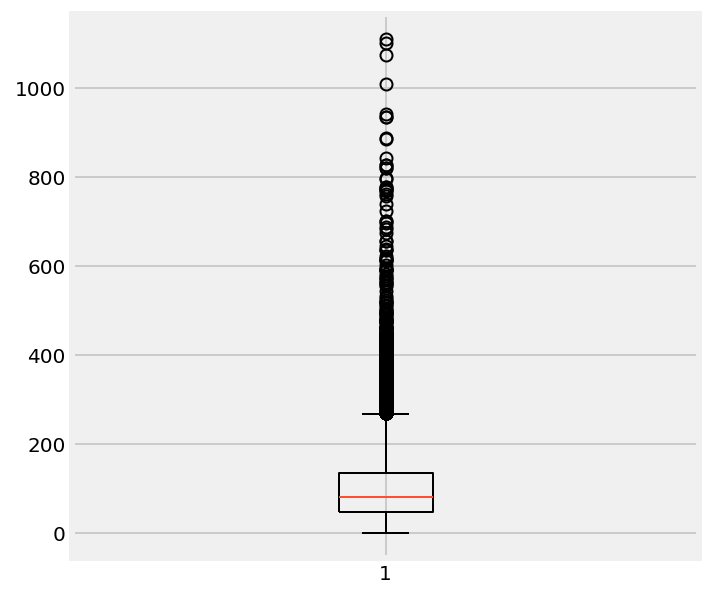

In [83]:
fig, ax = plt.subplots(figsize = (5, 5))
plt.boxplot(dtf_pumps.STEP11_clean_len)
plt.show()

In [85]:
dtf_pumps.to_csv("~/NLP/Project/data/models/tweets.csv", index = False); 